<a href="https://colab.research.google.com/github/Purvesh-Chitre/Assignment_Tasks/blob/Assignment_2/Copy_of_Assignment_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive and Predictive Analysis with Interactive Dashboard
Take any sales dataset of your choice and perform both descriptive and predictive analysis. Create an interactive dashboard using Python visualization libraries such as Plotly or Dash. Ensure that the graphs are interactive and can cross-filter each other. Include at least three different types of visualizations.

## Plan for the Assignment<br>

Descriptive Analysis: Summary statistics, trends, and distribution of sales.<br>
Predictive Analysis: Use Linear Regression to forecast sales.<br>
Interactive Dashboard: Use Plotly<br>


In [ ]:
# pip install pandas dash plotly scikit-learn

In [2]:
# !pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [23]:
# !pip install jupyter-dash dash plotly pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.5 MB/s eta 0:00:00


## Importing the required Libraries

In [3]:
# Import the pandas library for data manipulation and analysis
import pandas as pd
# Import the numpy library for numerical operations
import numpy as np
# Import the sqlite3 library for working with SQLite databases
import sqlite3
# Import the random library for generating random numbers
import random
# Import the datetime and timedelta classes from the datetime library for working with dates and times
from datetime import datetime, timedelta
# Import the pyplot module from matplotlib for creating static, interactive, and animated visualizations in Python
import matplotlib.pyplot as plt
# Import the seaborn library for building statistical graphics
import seaborn as sns
# Import the train_test_split function from sklearn.model_selection for splitting data into training and testing sets
from sklearn.model_selection import train_test_split
# Import the LinearRegression class from sklearn.linear_model for building linear regression models
from sklearn.linear_model import LinearRegression
# Import the Random FOrest Regressor
from sklearn.ensemble import RandomForestRegressor
# Import the mean_absolute_error and mean_squared_error functions from sklearn.metrics for evaluating model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Import the plotly.express library for creating interactive plots
import plotly.express as px
# # Import the dash library for building interactive web applications
# import dash
# # Import the dcc and html modules from dash for creating the layout of the web application
# from dash import dcc, html
# # Import the Input and Output classes from dash.dependencies for creating interactive components in the web application
# from dash.dependencies import Input, Output

## Generate a Larger Dataset with 1000 Entries

In [4]:
# Step 1: Generate a Larger Dataset with 1000 Entries
random.seed(42)
products = ["Laptop", "Smartphone", "Tablet", "Headphones", "Smartwatch"]
date_range = [datetime(2024, 1, 1) + timedelta(days=i) for i in range(100)]

In [5]:
sales_data = []
for _ in range(1000):
    sales_data.append([
        random.choice(products),
        random.randint(1, 10),  # Quantity sold
        round(random.uniform(100, 2000), 2),  # Price
        random.choice(date_range).strftime('%Y-%m-%d')  # Random date
    ])

## Create DataFrame


In [6]:
# Create DataFrame
sales_df = pd.DataFrame(sales_data, columns=["product", "quantity", "price", "sale_date"])

## Save to CSV

In [7]:
# Save to CSV
sales_df.to_csv("sales_data_updated.csv", index=False)

## Descriptive Statistics

In [8]:
# Step 2: Descriptive Analysis
print("Basic Statistics:\n", sales_df.describe())
print("\nData Info:\n")
sales_df.info()

Basic Statistics:
           quantity        price
count  1000.000000  1000.000000
mean      5.601000  1049.030240
std       2.943206   549.964232
min       1.000000   101.280000
25%       3.000000   591.840000
50%       6.000000  1018.750000
75%       8.000000  1532.462500
max      10.000000  1999.230000

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   product    1000 non-null   object 
 1   quantity   1000 non-null   int64  
 2   price      1000 non-null   float64
 3   sale_date  1000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


Overview of Sales Data <br>
- The dataset contains 1,000 sales records of different products.<br>
- Each sale includes product name, quantity sold, price per unit, and sale date.<br>

Understanding Quantity Sold <br>
- On average, about 5-6 units of a product are sold per transaction.<br>
- Some transactions only have 1 unit, while others have up to 10 units.<br>
- Most transactions fall between 3 to 8 units (25th to 75th percentile).<br>

Understanding Price Per Unit <br>
- The average price of a product is USD 1,049. <br>
- The cheapest product in the dataset costs USD 101, while the most expensive costs USD 1,999. <br>
- Most prices fall between USD 591 and USD 1,532, meaning we have a mix of budget and premium products. <br>

Data Quality & Structure <br>
No missing values, meaning the dataset is clean and complete. <br>
- The dataset uses the correct data types: <br>
**Numbers (quantity, price) for analysis** <br>
**Dates for time-based sales trends** <br>

## Predictive Analysis

In [9]:
# Step 3: Predictive Analysis - Sales Forecasting
sales_df['sale_date'] = pd.to_datetime(sales_df['sale_date'])
sales_df['year_month'] = sales_df['sale_date'].dt.to_period('M')

Explanation: Why are we converting sale_date to year_month?<br>

We are converting sale_date to datetime format and extracting year_month to group sales by month for trend analysis and forecasting.<br>

### Aggregate Sales by Month

In [10]:
# Aggregate sales by month
monthly_sales = sales_df.groupby('year_month')['quantity'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

Why is this important?<br>
- Sales forecasting relies on trends over time.<br>
- Aggregating by month smooths the data, helping the model detect patterns.<br>

### Train Test Split

In [11]:
# Train a Linear Regression Model
X = np.arange(len(monthly_sales)).reshape(-1, 1)
y = monthly_sales['quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Regressor

In [12]:
# Train Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

### Evaluate Model Performance

In [13]:
# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

Mean Absolute Error: 90.80
Mean Squared Error: 8244.64


**Explanation of Model Performance (Random Forest Regressor)**<br>

What Do These Numbers Mean?<br>

When we evaluate a predictive model, we use error metrics to measure how far off the model’s predictions are from the actual sales data.<br>

Understanding the Errors<br>
- Mean Absolute Error (MAE) = 90.80<br>
This means, on average, our model’s predictions are off by around 91 units when forecasting sales.<br>
A lower MAE is better, as it indicates more accurate predictions.<br>
- Mean Squared Error (MSE) = 8,244.64<br>
This number represents the average of squared differences between the predicted and actual values.<br>
Since errors are squared, larger errors impact this value more, making it useful for spotting major prediction mistakes.<br>
The higher this value, the more inaccurate our model is.<br>

## Feature Prediction

In [14]:
# Predict future sales for the next 6 months
future_X = np.arange(len(monthly_sales), len(monthly_sales) + 6).reshape(-1, 1)
future_predictions = rf_model.predict(future_X)

# Display future predictions
print("Future Sales Prediction for the next 6 months:")
for i, prediction in enumerate(future_predictions, 1):
    print(f"Month {i}: {prediction:.2f} units")

Future Sales Prediction for the next 6 months:
Month 1: 845.52 units
Month 2: 845.52 units
Month 3: 845.52 units
Month 4: 845.52 units
Month 5: 845.52 units
Month 6: 845.52 units


Explanation of Future Sales Prediction <br>

What Do These Predictions Mean?<br>

The model is forecasting that sales for the next six months will remain constant at 845.52 units per month.<br>

What This Suggests?<br>

- The model is likely overgeneralizing and predicting an average sales value instead of detecting real trends.<br>
- This could be due to insufficient patterns in the data or the model not capturing seasonality or trends properly.<br>
- In reality, sales numbers fluctuate due to factors like demand, promotions, and seasonal effects, but the model does not seem to account for these.<br>

In [20]:
print(sales_df.columns)

Index(['product', 'quantity', 'price', 'sale_date', 'year_month'], dtype='object')


## Data Visualization - Interactive Dashboard

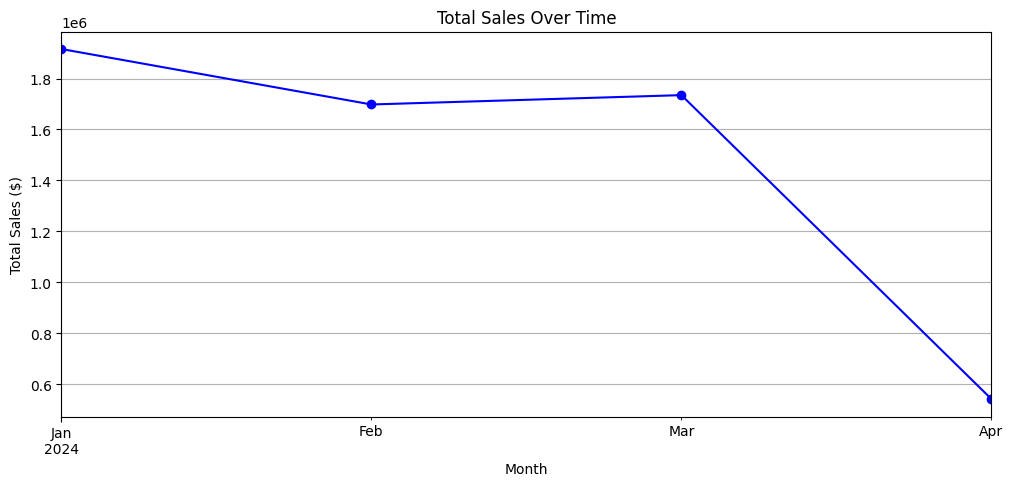

In [28]:
sales_df['total_price'] = sales_df['quantity'] * sales_df['price']

# 1 Total Sales Trend Over Time
plt.figure(figsize=(12, 5))
sales_df.groupby(sales_df['sale_date'].dt.to_period('M'))['total_price'].sum().plot(kind='line', marker='o', color='b')
plt.title("Total Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()


In [29]:
# 2 Top-Selling Products
top_products = sales_df.groupby('product')['quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Best-Selling Products:\n", top_products)


Top 5 Best-Selling Products:
 product
Tablet        1165
Smartwatch    1138
Headphones    1126
Smartphone    1100
Laptop        1072
Name: quantity, dtype: int64


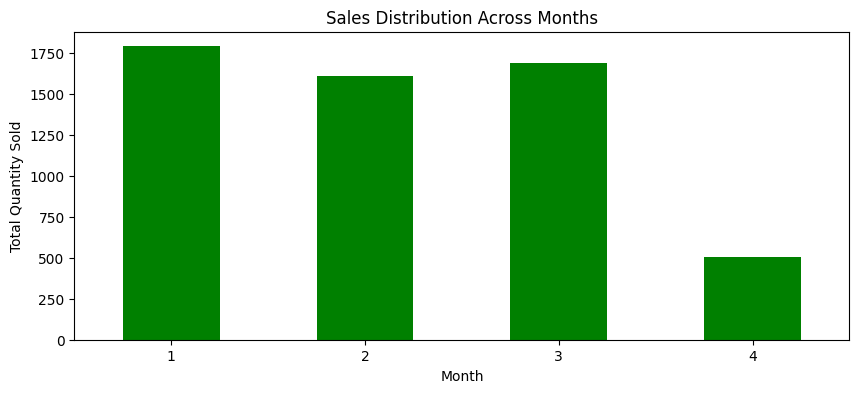

In [30]:
# 3 Seasonality Check (Sales by Month)
sales_df['month'] = sales_df['sale_date'].dt.month
monthly_sales = sales_df.groupby('month')['quantity'].sum()
plt.figure(figsize=(10, 4))
monthly_sales.plot(kind='bar', color='green')
plt.title("Sales Distribution Across Months")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=0)
plt.show()

In [31]:
# 4 Average Sale Price & Quantity Sold Per Product
product_sales = sales_df.groupby('product').agg({'total_price': 'sum', 'quantity': 'sum'})
product_sales['avg_price'] = product_sales['total_price'] / product_sales['quantity']
print("\nAverage Sale Price & Quantity Sold:\n", product_sales.sort_values(by='quantity', ascending=False).head(5))



Average Sale Price & Quantity Sold:
             total_price  quantity    avg_price
product                                       
Tablet       1279786.76      1165  1098.529408
Smartwatch   1159098.24      1138  1018.539754
Headphones   1099061.50      1126   976.075933
Smartphone   1151538.04      1100  1046.852764
Laptop       1201274.75      1072  1120.592118


1.	Top 5 Best-Selling Products <br>
- Tablets, smartwatches, and headphones are the highest-selling products.<br>
- Tablets lead with 1,165 units sold, followed by Smartwatches (1,138) and Headphones (1,126).<br>
- The average price for these products ranges from ~USD976 (Headphones) to ~USD1,120 (Laptop).<br>
2.	Sales Distribution Across Months (Bar Chart)<br>
- Sales were highest in January and March.<br>
- A sharp decline is visible in April, which might indicate seasonality, inventory issues, or reduced demand.<br>
3.	Total Sales Over Time (Line Chart)<br>
- A declining trend, especially in April, where sales drop significantly.<br>
- February and March appear to have stable sales.<br>
4.	Average Sale Price & Quantity Sold (Table)<br>
- Despite being the top-selling product, Tablets are not the most expensive.<br>
- Laptops have the highest average price but are not the top-selling item.<br>

In [27]:
# Step 4: Visualization Dashboard
# Convert 'year_month' to string to avoid JSON serialization error
sales_df['year_month'] = sales_df['year_month'].astype(str)

# Dropdown for product selection
selected_product = 'Tablet'  # Default selection

# Filter data
filtered_df = sales_df[sales_df['product'] == selected_product]

# Interactive bar chart - Monthly Sales
fig1 = px.bar(filtered_df, x='year_month', y='quantity', title=f"Sales of {selected_product} Over Time")

# Line chart - Total Sales Trend
fig2 = px.line(sales_df.groupby('year_month')['price'].sum().reset_index(),
               x='year_month', y='price', markers=True, title="Total Sales Over Time")

# Show plots
fig1.show()
fig2.show()

1. Sales of Tablets Over Time (Bar Chart) <br>
- The bar chart shows how many tablets were sold in different months.<br>
- The sales were high in some months (e.g., December and March) but dropped significantly in April.<br>
- This means that tablet sales are not consistent every month. Some months perform much better than others.<br>

2. Total Sales Over Time (Line Chart)<br>
- This chart shows the total money earned from all sales (not just tablets) over time.<br>
- The sales were steady at first, but there is a big drop towards the most recent months.<br>
- This could mean fewer products were sold recently, or that customers bought lower-priced items.<br>

3. Key Takeaways:<br>
- Tablet sales fluctuate, meaning demand changes over time.<br>
- Overall revenue is declining in recent months, which could indicate lower sales, seasonal changes, or customer preferences shifting.<br>
- It may be worth investigating why sales dropped (e.g., market trends, competition, or stock availability).<br>